# Análisis exploratorio de datos

En este notebook vamos a cargar los datos procesados en los otros dos notebooks anteriores (`procesamiento-nuevos-features-reentrega.ipynb` y `completar-datos-faltantes.ipynb`) y utilizarlos para plantearnos preguntas y buscarlas respuestas correspondientes en el dataset. Un detalle importante es que parte de el análisis aquí visto puede terminar cambios en el preprocesamiento (en resumen: el proceso es iterativo hasta llegar al punto en el que consideramos es _"suficientemente bueno"_). Por esto es posible que conclusiones intermedias vistas acá se reflejen en decisiones tomadas en los otros notebooks. Básicamente: **no se pueden limpiar los datos a ciegas**, intentamos separar estas dos tareas en dos notebooks distintos pero eso no significa que el análisis y la limpieza sean dos tareas separables (sino que creemos ayuda a la lectura darles un orden).

Inicialmente partiremos del dataset sin completar (`../data/dataset-sin-completar.csv`) y el que usamos la media de cada región para completar los datos faltantes luego de eliminar outliers (`../data/dataset-completado.csv`).

In [1]:
# Cargamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import seaborn as sns

## Carga de los datasets

In [2]:
# Cargamos el dataset sin completar ni borrar outliers
dataset = pd.read_csv('../data/dataset-sin-completar.csv')
del dataset['Unnamed: 0']
dataset

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,Estimated road traffic death rate,Age-standardized suicide rates,Population using safely managed drinking-water services (%),Population using safely managed sanitation services (%),Region
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,16.58125,15.58125,0.415375,8.21250,Developing,14.645625,7.049375,16.724375,NaN,Eastern Mediterranean
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,1.61875,1.70000,0.709875,12.13750,Developing,14.352500,6.140208,58.218125,43.151250,Europe
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,6.09375,5.97500,0.694875,12.71250,Developing,22.130000,3.521250,73.660000,20.226250,Africa
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,6.19375,6.66875,0.458375,8.04375,Developing,24.918750,15.771875,NaN,NaN,Africa
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,3.42500,3.37500,0.488625,8.84375,Developing,5.093750,0.796667,NaN,NaN,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,...,1.65000,1.56250,0.726812,12.78750,Developing,32.036875,4.313750,NaN,21.393636,Americas
179,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,...,14.92500,15.62500,0.627063,11.51250,Developing,24.743750,7.350208,NaN,NaN,Western Pacific
180,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,...,13.83125,13.75000,0.475500,8.50625,Developing,22.860000,7.715833,NaN,21.715625,Eastern Mediterranean
181,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,52.3750,...,6.88125,6.76250,0.498437,11.21250,Developing,23.893750,21.276250,NaN,NaN,Africa


In [3]:
# Cargamos el dataset sin completar ni borrar outliers
dataset_completado = pd.read_csv('../data/dataset-completado.csv')
del dataset_completado['Unnamed: 0']
dataset_completado

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,Estimated road traffic death rate,Age-standardized suicide rates,Population using safely managed drinking-water services (%),Population using safely managed sanitation services (%),Region
0,Afghanistan,58.19375,269.062500,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,16.58125,15.58125,0.415375,8.21250,Developing,14.645625,7.049375,16.724375,50.366476,Eastern Mediterranean
1,Albania,75.15625,45.062500,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,1.61875,1.70000,0.709875,12.13750,Developing,14.352500,6.140208,58.218125,43.151250,Europe
2,Algeria,73.61875,108.187500,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,6.09375,5.97500,0.694875,12.71250,Developing,22.130000,3.521250,73.660000,20.226250,Africa
3,Angola,49.01875,328.562500,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,6.19375,6.66875,0.458375,8.04375,Developing,24.918750,15.771875,20.582303,15.728312,Africa
4,Antigua and Barbuda,75.05625,127.500000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,3.42500,3.37500,0.488625,8.84375,Developing,5.093750,0.796667,68.754436,43.347141,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),73.38750,163.000000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,...,1.65000,1.56250,0.726812,12.78750,Developing,32.036875,4.313750,68.754436,21.393636,Americas
179,Viet Nam,74.77500,126.562500,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,...,14.92500,15.62500,0.627063,11.51250,Developing,24.743750,7.350208,55.218103,56.179760,Western Pacific
180,Yemen,63.86250,211.812500,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,...,13.83125,13.75000,0.475500,8.50625,Developing,22.860000,7.715833,68.726198,21.715625,Eastern Mediterranean
181,Zambia,53.90625,354.312500,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,52.3750,...,6.88125,6.76250,0.498437,11.21250,Developing,23.893750,21.276250,20.582303,15.728312,Africa


# Dataset _"base"_ (sin eliminar outliers ni completar valores faltantes)

Como primer acercamiento a los datos recordemos nuestra misión: encontrar un buen modelo de regresión que nos permita comprender como las variables del dataset afectan a la expectativa de vida. Puede resultarnos interesante para esto ver la correlación entre las variables que tenemos y la expectativa de vida.

In [4]:
dataset.corr()['Life expectancy'].sort_values(key=pd.Series.abs)

Population                                                    -0.039915
infant deaths                                                 -0.199914
Measles                                                       -0.201076
under-five deaths                                             -0.225785
Total expenditure                                              0.290713
Age-standardized suicide rates                                -0.376087
Hepatitis B                                                    0.429536
Alcohol                                                        0.461720
thinness 5-9 years                                            -0.515970
thinness  1-19 years                                          -0.523989
percentage expenditure                                         0.524320
HIV/AIDS                                                      -0.587153
GDP                                                            0.611808
Diphtheria                                                     0

De esto podemos ver varias variables bastante prometedoras. Aunque aún más importante que las variables con correlación alta son las que tienen correlación baja, como `Population`.

## Pequeño análisis de `Population`

                      Country    Population
5                   Argentina  2.012120e+07
34                      China  3.218121e+05
74                      India  4.214677e+08
174  United States of America           NaN


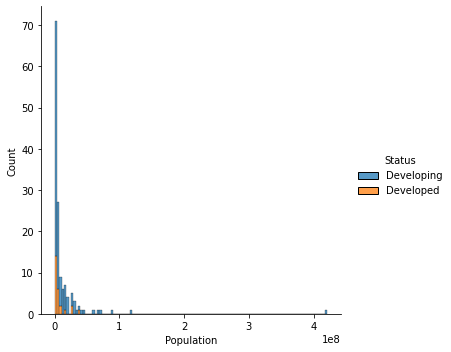

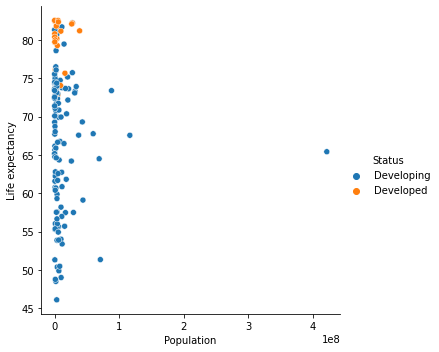

In [5]:
sns.displot(data=dataset, x='Population', hue='Status', multiple='stack')
sns.relplot(data=dataset, x='Population', y='Life expectancy', hue='Status')
print(dataset.query('Country in ["China", "United States of America", "Argentina", "India"]')[['Country', 'Population']])

Al parecer no tenemos datos muy confiables. Es sabido que Argentina tiene entre 40 y 50 millones de habitantos, que el país con mayor cantidad de habitantes a la fecha es China y que Estados Unidos tiene _alguna cantidad_ de habitantes.

En primera instancia nuestro conocimiento de como se manifiesta la esperanza de vida nos puede dar una idea de por que la cantidad de gente (dada una superficie suficientemente grande) no debería afectar significativamente a la expectativa de vida.

Dicho esto, dado que los datos que tenemos parecen decaer exponencialmente vale la pena considerar si el orden de magnitud de la población puede resultar un mejor predictor.

Correlación logpop-expectativa: -0.14587644486248527


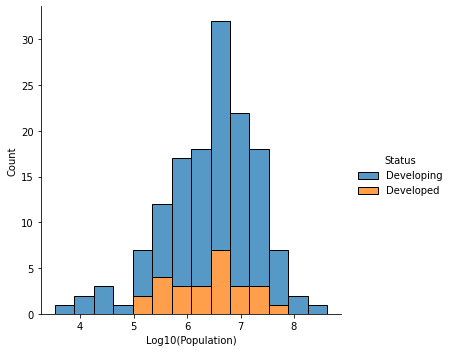

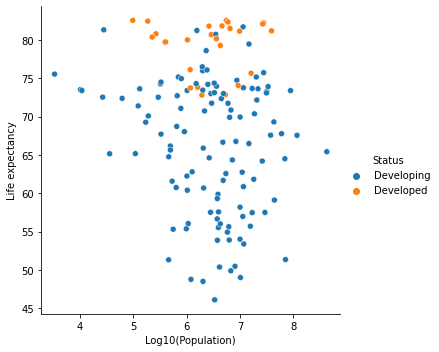

In [6]:
dataset_logpop = dataset.copy()
dataset_logpop['Log10(Population)'] = np.log10(dataset_logpop['Population'])
sns.displot(data=dataset_logpop, x='Log10(Population)', hue='Status', multiple='stack')
sns.relplot(data=dataset_logpop, x='Log10(Population)', y='Life expectancy', hue='Status')
print('Correlación logpop-expectativa:', dataset.corrwith(dataset_logpop['Log10(Population)'])['Life expectancy'])

Ahora la distribución se asemeja mucho más a una normal, pero seguimos sin notar una correlación interesante. Observado esto (y teniendo en cuenta que ya detectamos varios errores de carga groseros) vamos entonces a **ignorar esta variable**.

## Análisis de las mortalidades

Uno de los _"tipos"_ de variables más común que tenemos son mortalidades:
- **Adult mortality (Mortandad adulta):** Probabilidad de morir entre los 15 y 60 años por cada 1000 habitantes.
- **Under-five deaths:** Cantidad de muertes antes del quinto año de vida por 1000 habitantes.
- **Infant deaths (Muertes infantiles):** Cantidad de muertes antes del primer año de vida por cada 1000 habitantes.
- **HIV/AIDS:** Muertes por VIH/SIDA por cada 1000 nacidos vivos antes de los 4 años.
- **Age-standardized mortality rate (per 100.000 population):** Promedio ponderado de las tasas de mortalidad por suicidio cada 100000 personas.
- **Estimated road traffic death rate (per 100.000 population):** Muertes causadas por accidentes de tránsito por cada 100000 personas.

Nos interesa entonces saber cuáles de estas son similares entre sí. Esperaríamos por la composición de las variables que `Under-five deaths` resulte muy similar a `Infant deaths (Muertes infantiles)` por ejemplo. Por otra parte la mortalidad adulta es una variable súper similar a la expectativa de vida.

Como antes, comencemos viendo cómo se relacionan estas variables entre sí:

In [7]:
mortalidades = dataset[['Country', 'Status', 'Adult Mortality', 'under-five deaths', 'infant deaths', 'HIV/AIDS', 'Age-standardized suicide rates', 'Estimated road traffic death rate']]
mortalidades

,Country,Status,Adult Mortality,under-five deaths,infant deaths,HIV/AIDS,Age-standardized suicide rates,Estimated road traffic death rate
0,Afghanistan,Developing,269.0625,107.5625,78.2500,0.10000,7.049375,14.645625
1,Albania,Developing,45.0625,0.9375,0.6875,0.10000,6.140208,14.352500
2,Algeria,Developing,108.1875,23.5000,20.3125,0.10000,3.521250,22.130000
3,Angola,Developing,328.5625,132.6250,83.7500,2.36875,15.771875,24.918750
4,Antigua and Barbuda,Developing,127.5000,0.0000,0.0000,0.12500,0.796667,5.093750
...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),Developing,163.0000,10.7500,9.3750,0.10000,4.313750,32.036875
179,Viet Nam,Developing,126.5625,36.5000,29.1875,0.14375,7.350208,24.743750
180,Yemen,Developing,211.8125,51.6250,39.3750,0.10000,7.715833,22.860000
181,Zambia,Developing,354.3125,52.3750,33.4375,11.93125,21.276250,23.893750


,Adult Mortality,under-five deaths,infant deaths,HIV/AIDS,Age-standardized suicide rates,Estimated road traffic death rate
Adult Mortality,1.000000,0.119620,0.099440,0.696999,0.503696,0.668211
under-five deaths,0.119620,1.000000,0.996959,0.037544,0.007484,0.117469
infant deaths,0.099440,0.996959,1.000000,0.024589,0.003860,0.100684
HIV/AIDS,0.696999,0.037544,0.024589,1.000000,0.621306,0.465802
Age-standardized suicide rates,0.503696,0.007484,0.003860,0.621306,1.000000,0.265920
Estimated road traffic death rate,0.668211,0.117469,0.100684,0.465802,0.265920,1.000000


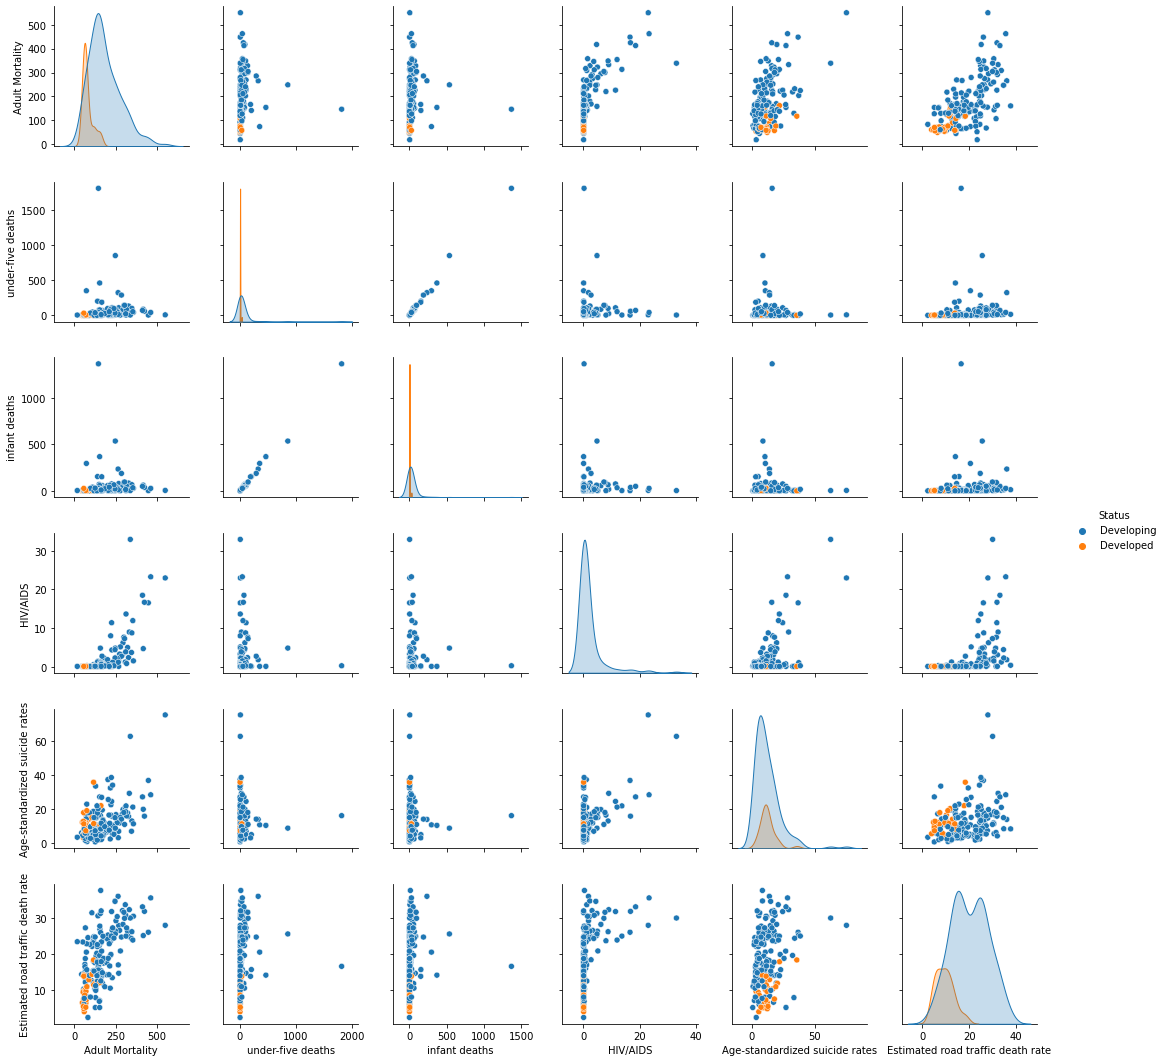

In [8]:
sns.pairplot(mortalidades, hue='Status')
mortalidades.corr()

Hay varias cosas interesantes a notar:
1. Si bien todas las variables miden algún tipo de _"mortalidad"_ no todas correlacionan entre sí.
2. _under-five deaths_ correlaciona con _infant deaths_ porque una usa un subconjunto de los datos de la otra.
3. Las muertes por accidentes de tránsito y la mortandad adulta parecen comportarse muy distinto según si el país es desarrollado o no.

## ¿Afecta el consumo de alcohol a los accidentes de tránsito?

Esta es una pequeña pregunta que había quedado planteada en la entrega original de este trabajo. Sin ánimos de hacer un análisis detallado esperamos ver como outliers a países con consumo muy alto de alcohol (intuyendo que _"cuán mal se puede manejar"_ tiene una cota superior) mientras que en la mayoría de los países el consumo de alcohol conlleva indirectamente a mayor cantidad de accidentes de tránsito.

,Alcohol,Estimated road traffic death rate
Alcohol,1.000000,-0.389651
Estimated road traffic death rate,-0.389651,1.000000


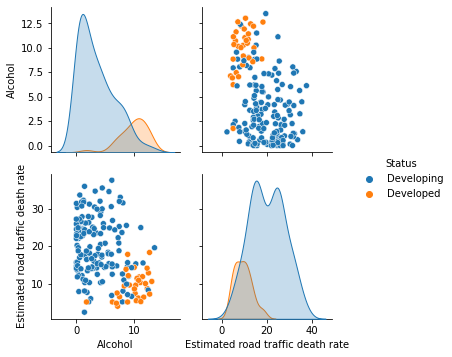

In [9]:
drunk_driving = dataset[['Country', 'Status', 'Alcohol', 'Estimated road traffic death rate']]
sns.pairplot(drunk_driving, hue='Status')
drunk_driving.corr()

¡Para nuestra sorpresa no hay una relación obvia! Sumado a esto los países desarrollados son **los mayores consumidores de alcohol** y los que menos accidentes de tránsito tienen.

¿Será que la capacidad de construir buena infraestructura vehicular resulta más importante?

## Programas de vacunación

En el dataset usado hay varias variables relacionadas a programas de vacunación:
- **Hepatitis B:** Cobertura de vacunación contra la hepatitis B (HepB) entre los niños de hasta 1 año.
- **Polio:** Cobertura de vacunación contra la poliomielitis (Pol3) entre los niños de hasta 1 año.
- **Diphtheria:** Cobertura de vacunación contra la difteria, el tétanos y la tos ferina (DTP3) entre los niños de hasta 1
año.

Para esto creemos que en los países desarrollados todos los programas de vacunación tienen niveles de avance similares. Por otra parte, en los países en desarrollo tiene sentido priorizar una u otra vacuna estratégicamente con el fin primario de prevenir epidemias locales.

,Hepatitis B,Polio,Diphtheria
Hepatitis B,1.000000,0.790883,0.792999
Polio,0.790883,1.000000,0.945657
Diphtheria,0.792999,0.945657,1.000000


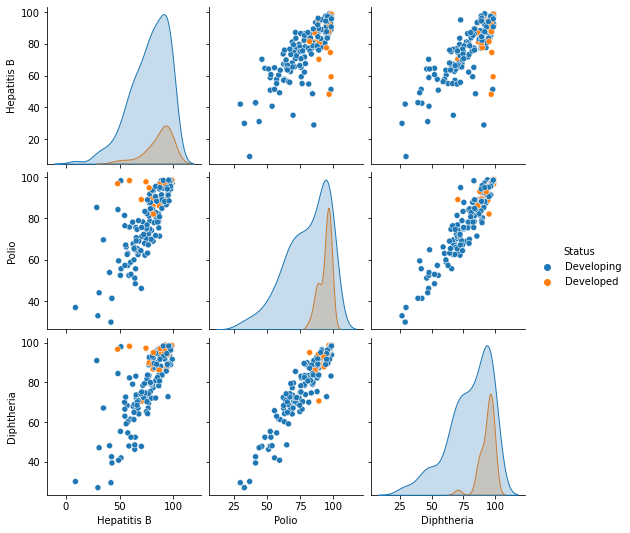

In [10]:
vacunacion = dataset[['Country', 'Region', 'Status', 'Hepatitis B', 'Polio', 'Diphtheria']]
sns.pairplot(vacunacion, hue='Status')
vacunacion.corr()

Por suerte la visualización nos trajo bastantes pocas sorpresas. Consideramos interesante que las vacunas contra la polio y la difteria parecieran ser un poco menos populares en países desarrollados (al revés de lo que pensábamos, dónde algunas vacunas iban a ser más comunes en países desarrollados que países en desarrollo).

Podría ser interesante considerar la distribución de las vacunas por región:

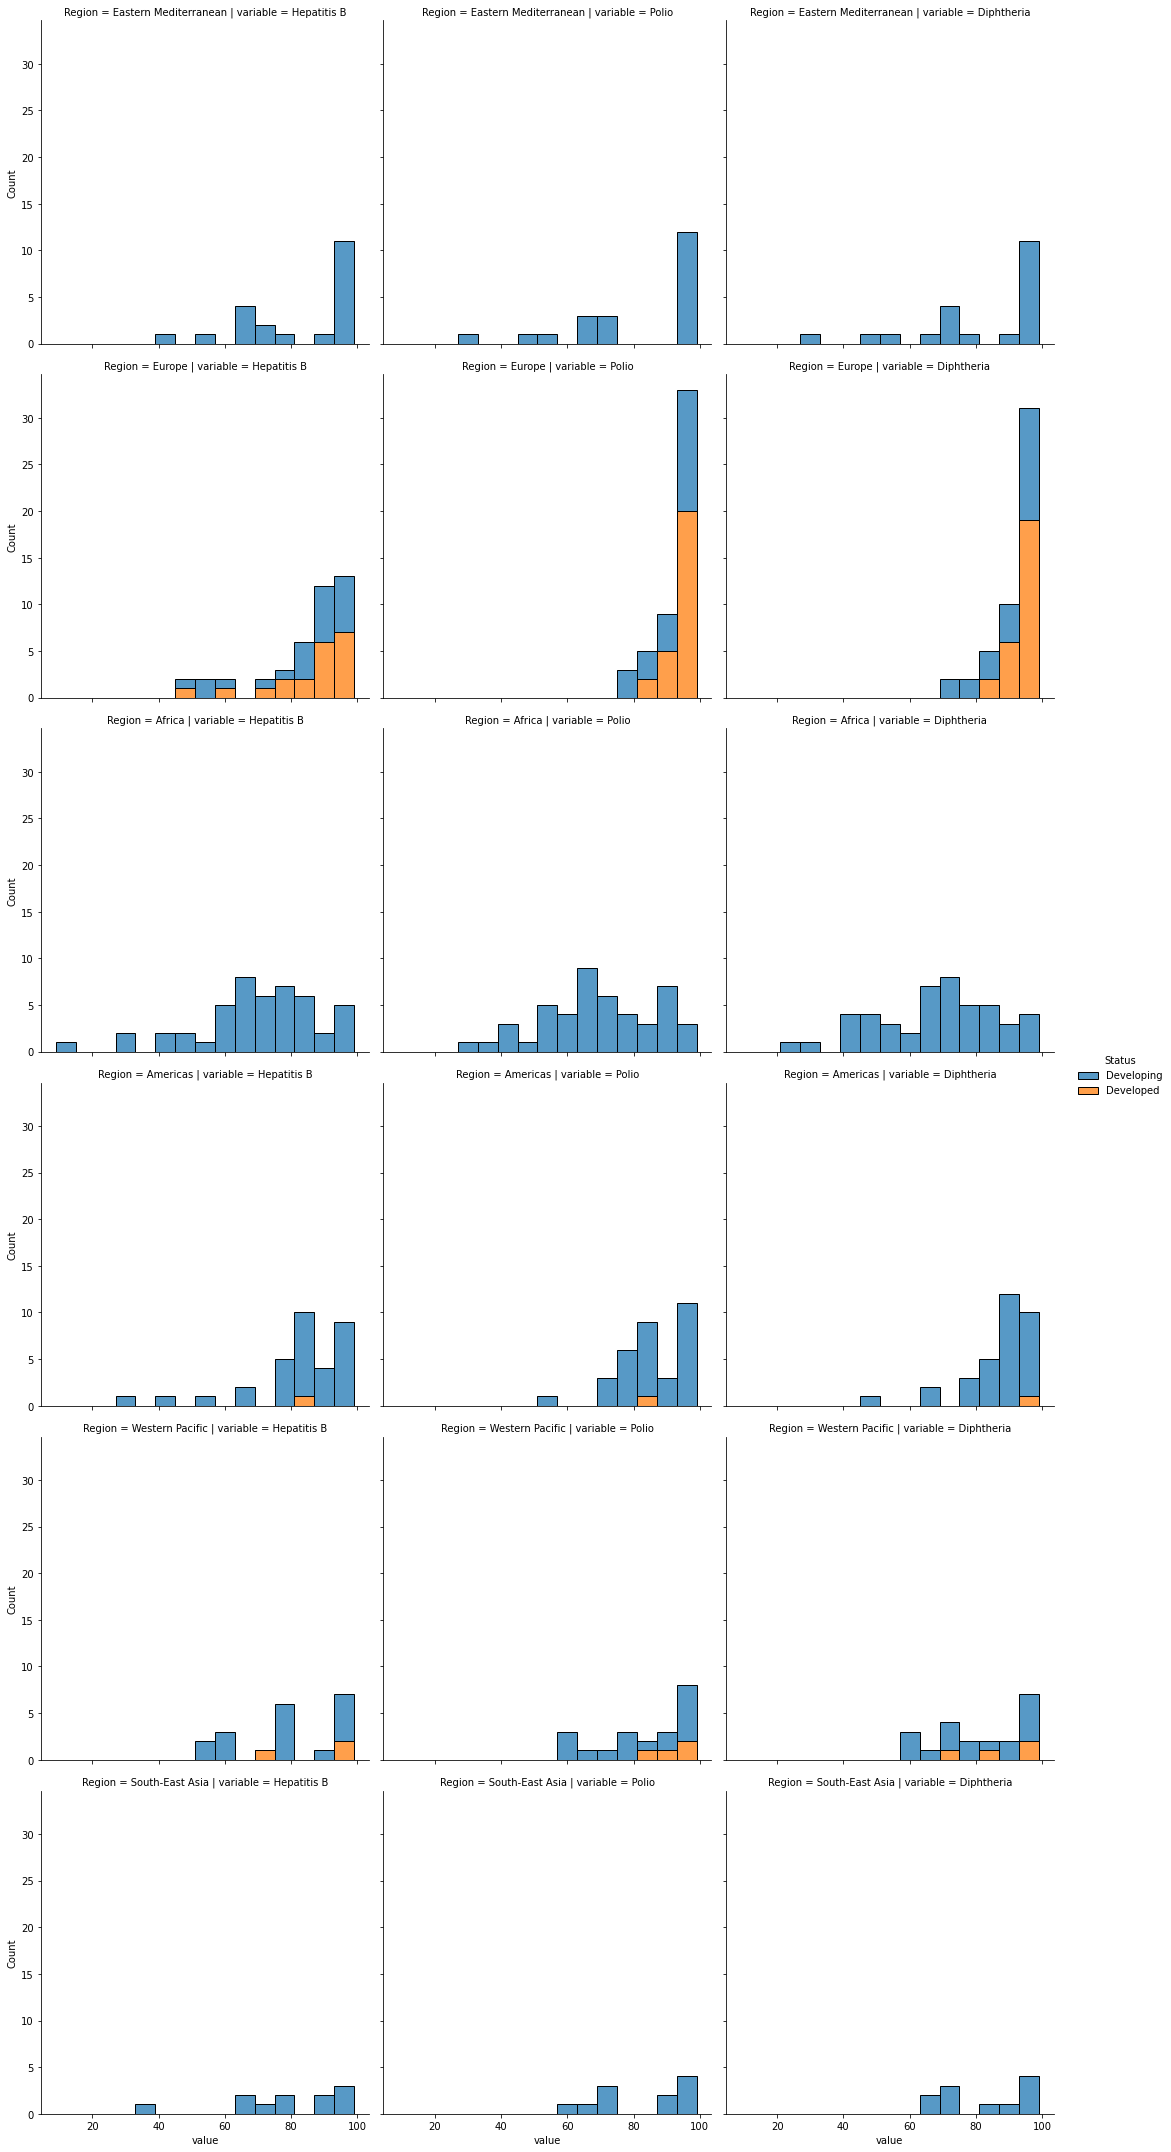

In [11]:
vacunacion_molten = vacunacion.melt(id_vars=['Country', 'Region', 'Status'])
sns.displot(vacunacion_molten, x='value', col='variable', row='Region', hue='Status', multiple='stack')

Al menos a simple vista la distribución de las variables parece mantenerse estable para cada región.

### Modelado probabilístico simple de la expectativa de vida utilizando la mortandad adulta

Si asumimos una probabilidad constante de morirse año a año podríamos modelar la expectativa de vida como la esperanza de una variable exponencial.

Supongamos:
$$
\text{Años de vida} \sim \text{Exp}(\lambda) \\
\text{Life expectancy} = \mathbb{E}(\text{Años de vida})
$$
De esto sabemos que:
$$
\begin{align*}
\mathbb{P}(\text{Años de vida} < 60\ |\ \text{Años de vida} \geq 15) =&\ \text{Adult mortality}\\
\mathbb{P}(\text{Años de vida} < 45)=&\\
1 - e^{-\lambda 45} =&\\
e^{-\lambda 45} =& 1 - \text{Adult mortality}\\
-\lambda 45 =& \ln(1 - \text{Adult mortality})\\
\lambda =& \frac{-\ln(1 - \text{Adult mortality})}{45}\\
\end{align*}
$$
Finalmente, dado que si $X \sim \text{Exp}(\lambda)$ entonces $\mathbb{E}(X) = \frac{1}{\lambda}$ tenemos:
$$
\text{Life expectancy} = \frac{-45}{\ln(1 - \text{Adult mortality})}
$$
Esto tiene algo de sentido, como $\text{Adult mortality}$ se encuentra entre 0 y 1 entonces $1 - \text{Adult mortality}$ también. Por esto el logaritmo siempre resulta un valor negativo que al ser multiplicado por $-45$ se vuelve positivo (y esperamos que todas las personas vivan un cantidad no-negativa de años.

Dicho esto, probemos el estimador. Aunque sea sólo por curiosidad:

Nueva columna
0      143.573954
1      975.940133
2      393.015262
3      112.970425
4      329.929863
          ...    
178    252.906729
179    332.548265
180    189.060320
181    102.871336
182     72.511176
Name: Adult Mortality, Length: 183, dtype: float64
Correlación con la expectativa de vida: 0.6911897663597021


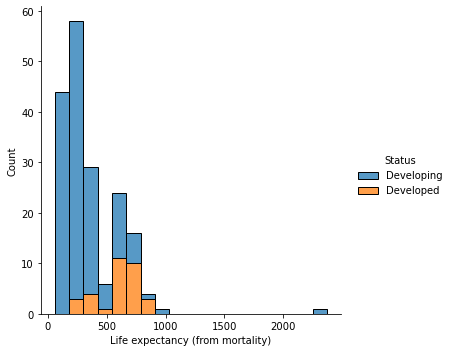

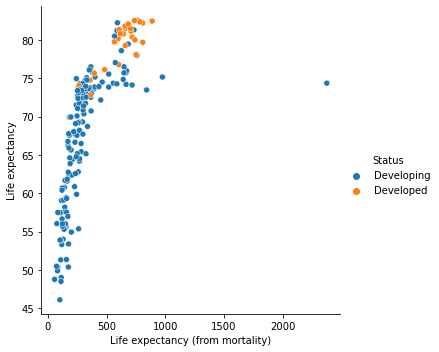

In [12]:
# Detalle: como es cada 1000 habitantes tenemos que dividir por mil
alternative_life_expectancy = -45 / np.log(1 - dataset['Adult Mortality'] / 1000)
print('Nueva columna')
print(alternative_life_expectancy)
print('Correlación con la expectativa de vida:', dataset.corrwith(alternative_life_expectancy)['Life expectancy'])

dataset_alternative_life_expectancy = dataset.copy()
dataset_alternative_life_expectancy['Life expectancy (from mortality)'] = alternative_life_expectancy
sns.displot(data=dataset_alternative_life_expectancy, x='Life expectancy (from mortality)', hue='Status', multiple='stack')
sns.relplot(data=dataset_alternative_life_expectancy, x='Life expectancy (from mortality)', y='Life expectancy', hue='Status')

Las estimaciones están en un rango ridículo (¡Un promedio de más de 100 años!) y la correlación empeoró considerablemente (de ~-0.9 a ~0.6). Esto puede deberse a que la interpretación de los datos es incorrecta (en realidad miden $\mathbb{P}(15 \leq \text{Años de vida} \leq 60))$) y/o a que el modelo propuesto es muy simplista (es sabido que las dificultades de salud más grandes ocurren en la infancia temprana y en la vejez para la mayoría de los casos).

Dicho esto observemos por última vez esta variable:

Correlación con la expectativa de vida: -0.8964413528900183


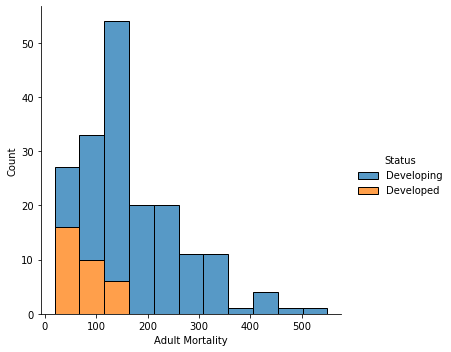

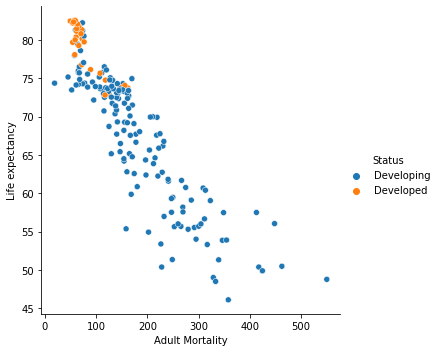

In [13]:
print('Correlación con la expectativa de vida:', dataset.corr()['Life expectancy']['Adult Mortality'])
sns.displot(data=dataset, x='Adult Mortality', hue='Status', multiple='stack')
sns.relplot(data=dataset, x='Adult Mortality', y='Life expectancy', hue='Status')

Podemos ver claramente que al crecer la mortandad adulta la expectativa de vida baja con ella. Sumado a esto, es interesantísimo notar que en el _spread_ vertical para ciertos rangos de mortandad es bastante alto. **¡La franja entre 0.1% y 0.2% tiene tanto países con una expectativa de 75 años como países con una de 55!**

Finalmente, capacidad de explicar la expectativa de vida consideramos la mortandad adulta un indicador muy pobre semánticamente. Si quisiéramos usarlo para tomar decisiones decir _"la expectativa de vida del país es muy baja porque la gente se muere relativamente joven"_ no nos permitiría tomar acciones estratégicas para mejorar la situación.

## Forma de los distintos tipos de infraestructura

En las variables analizadas hay varios factores socioeconómicos que se podrían considerar _"infraestructurales"_ (es decir, que implican fuertemente la existencia de infraestructura útil para una sociedad). En esta sección queremos analizar como se distribuyen región a región y cuánto afecta el que un país sea o no desarrollado en la distribución de las variables.

Las variables a analizar son:
- **GDP:** Producto interno bruto per cápita (en USD).
- **Percentage expenditure:** Gasto en salud como porcentaje del Producto Bruto Interno per cápita.
- **Total expenditure:** Gasto del gobierno general en salud como porcentaje del gasto público total.
- **Schooling (Escolaridad):** Número de años de escolaridad.
- **Population using safely managed sanitation services:** Proporción de la población con acceso a servicios sanitarios (cloacas, baños, etc) _"seguros"_.
- **Population using safely managed drinking-water services:** Proporción de la población con acceso a agua apta y segura para consumo humano.

La razón por la que consideramos todas estas variables juntas fué para entender el impacto que tienen entre sí los que consideramos son los tres servicios más básicos de un estado: la medicina, la educación y el acceso al agua/sanidad. Entendemos que dependiendo de cada estado se puede priorizar una u otra cosa estratégicamente y esperamos ver eso para los países en desarrollo. Por otra parte, creemos que los países desarrollados deberían tener todo perfiles altamente similares.

En primera instancia observemos la distribución de nuestras variables. Primero segmentada por estado del país y luego por región.

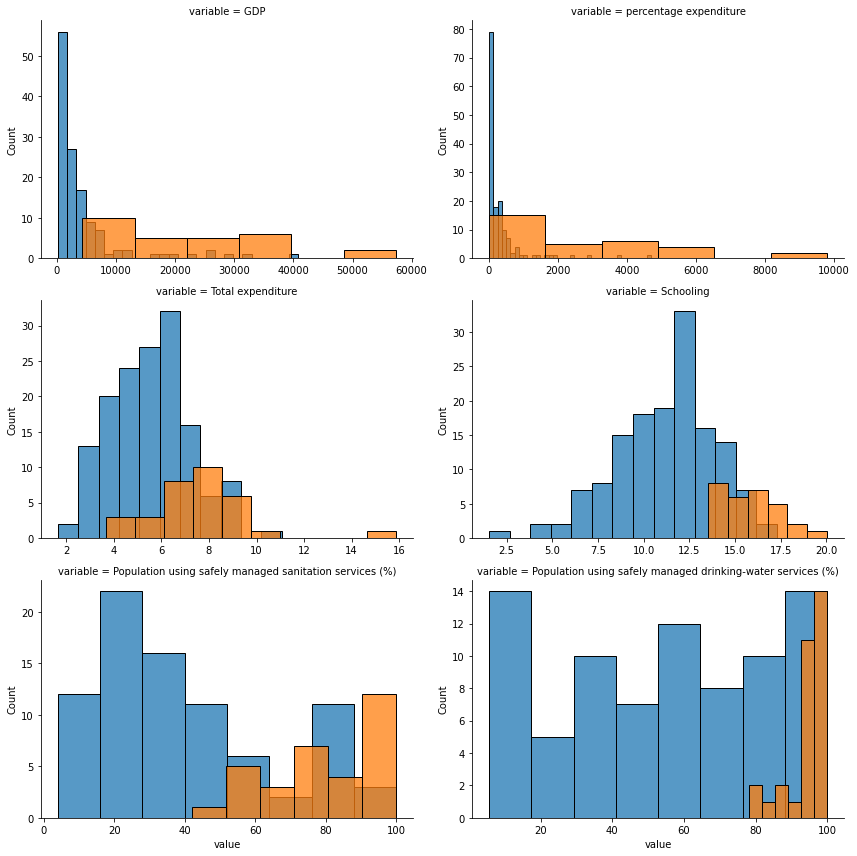

In [14]:
infra = dataset[['Country', 'Region', 'Status', 'GDP', 'percentage expenditure', 'Total expenditure', 'Schooling', 'Population using safely managed sanitation services (%)', 'Population using safely managed drinking-water services (%)']]
infra_molten = infra.melt(id_vars=['Country', 'Region', 'Status'])
g = sns.FacetGrid(infra_molten, col='variable', hue='Status', col_wrap=2, sharex=False, sharey=False, height=4, aspect=1.5)
g.map(sns.histplot, 'value')

Vemos entonces que para **GDP** y **Percentage expenditure** las distribuciones se alinean razonablemente bien (tengamos en cuenta que hay muchos más países en desarrollo que desarrollados). Esto no se mantiene con el resto de las variables, allí los países desarrollados mantienen una media notablemente superior a la de los países en desarrollo.

Visto esto queremos analizar también el efecto propio de las regiones en las variables:

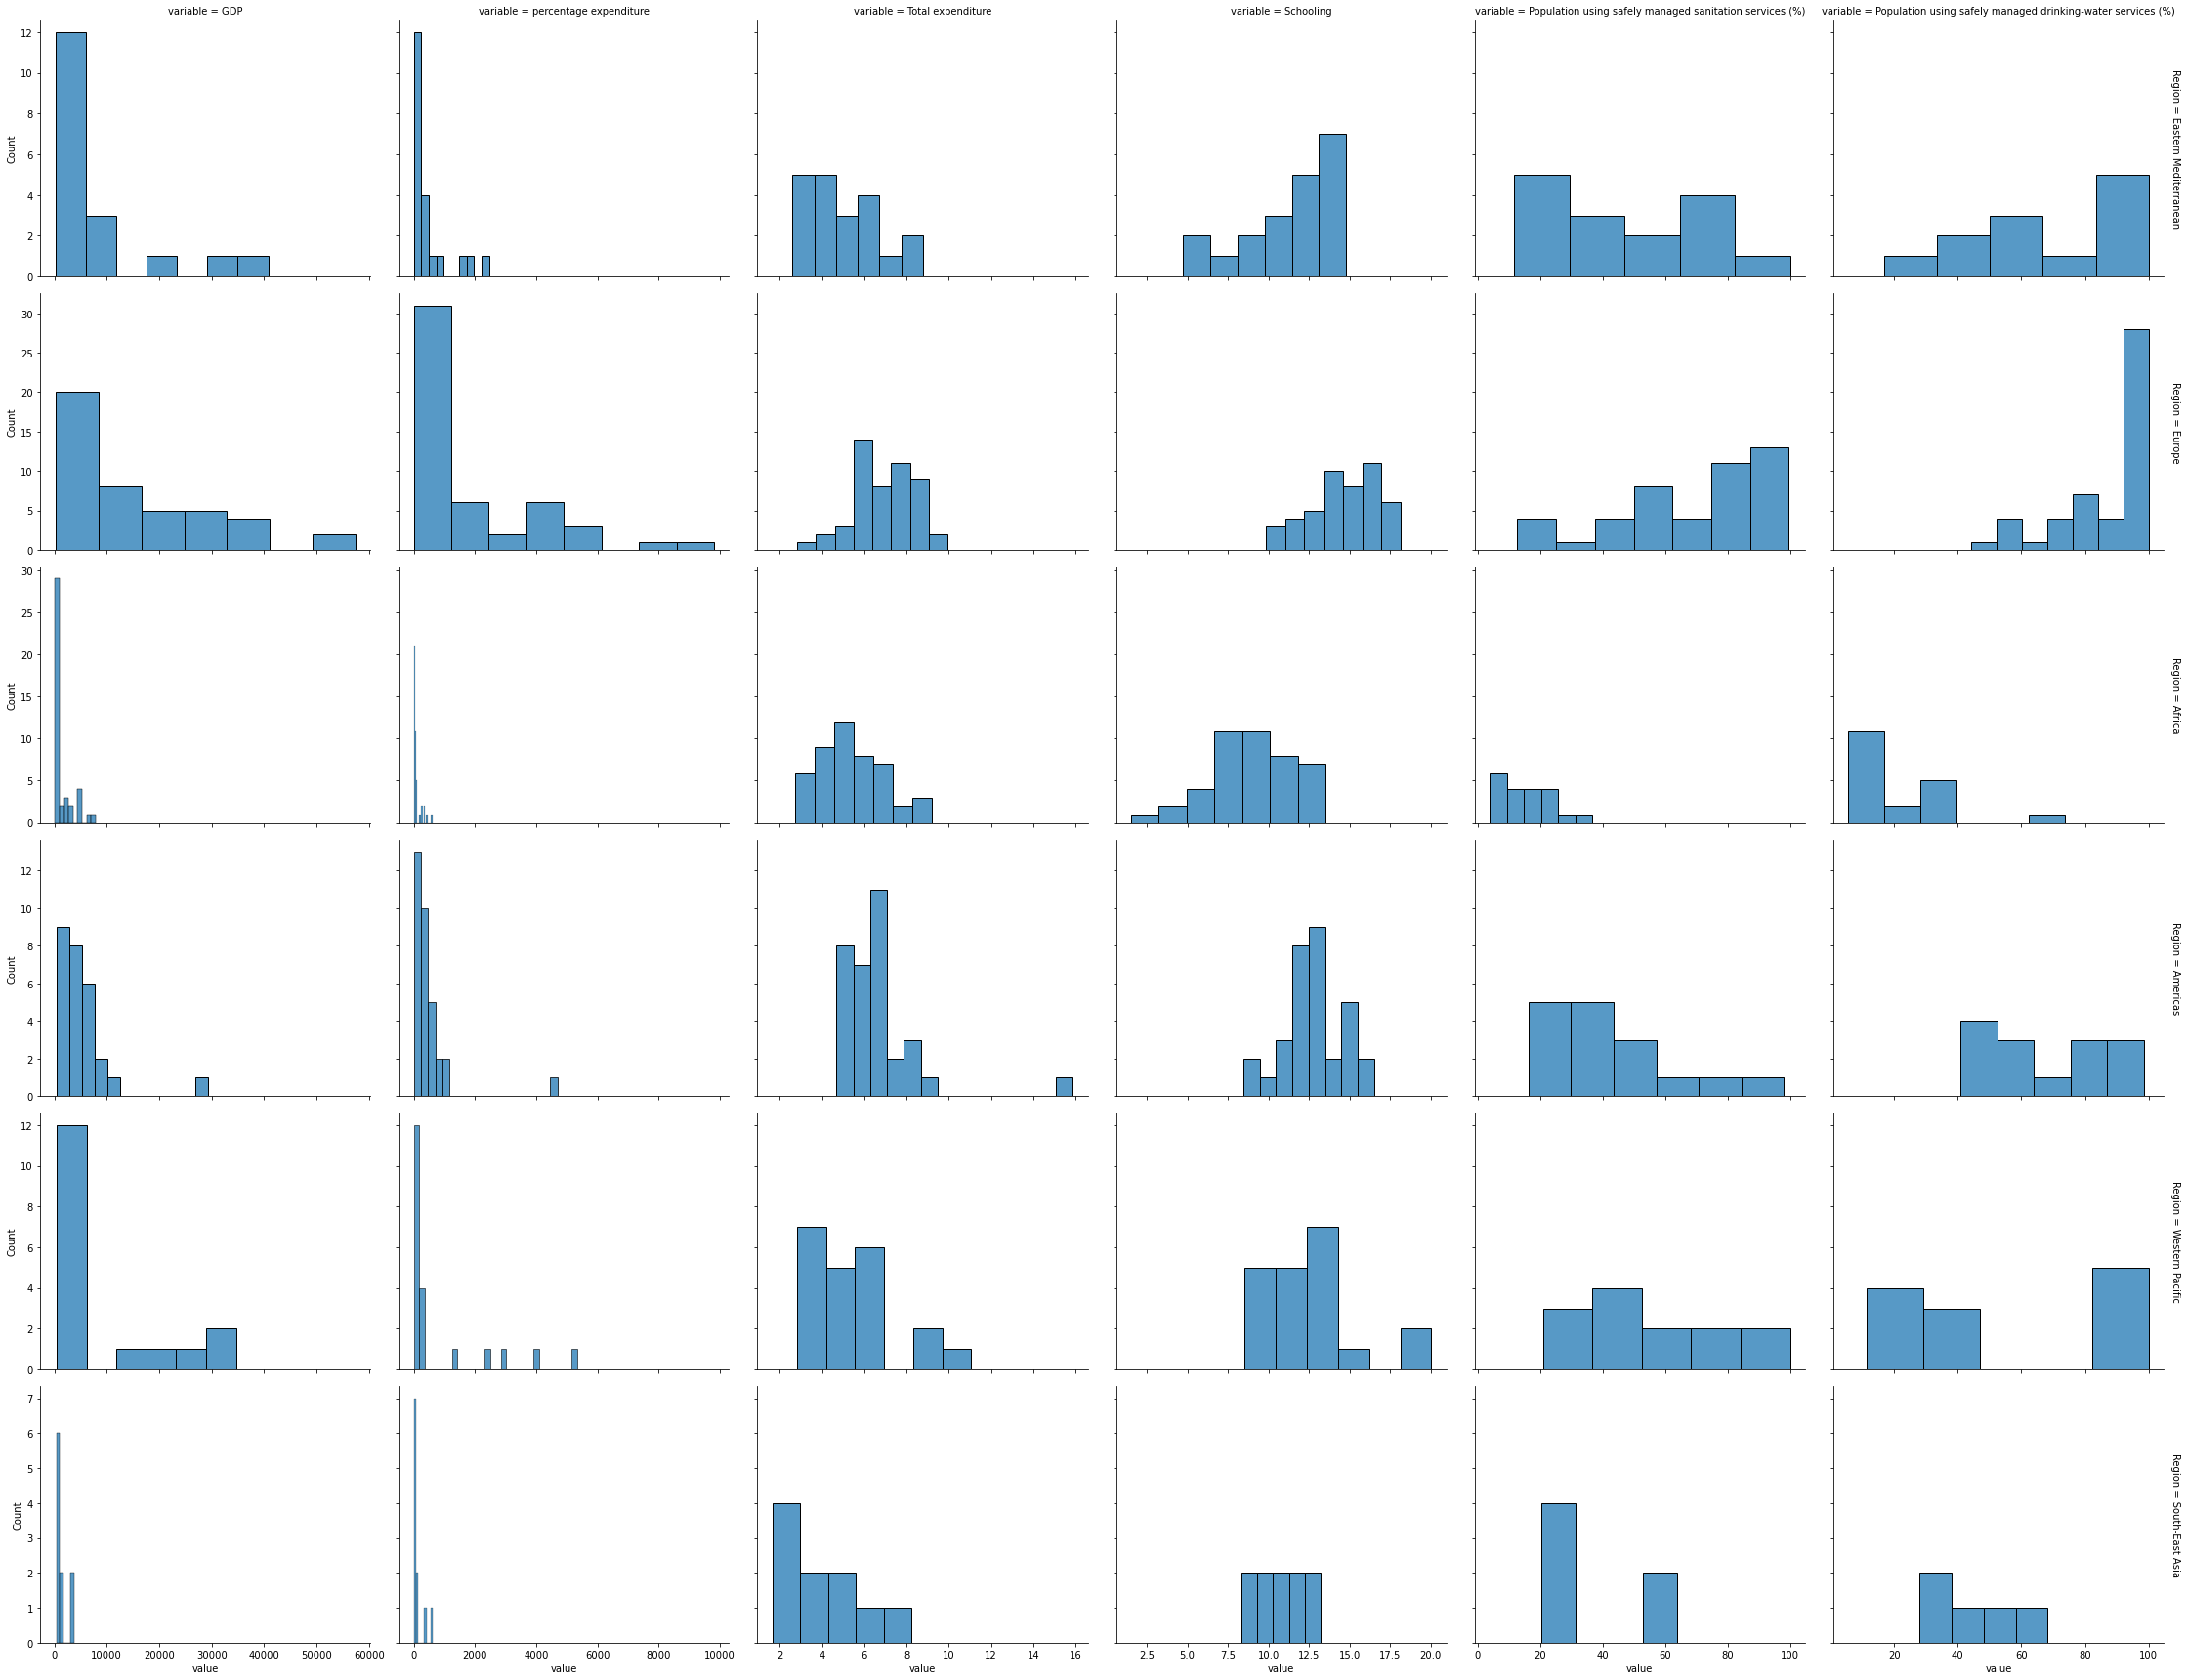

In [15]:
g = sns.FacetGrid(infra_molten, col='variable', row='Region', sharex='col', sharey='row', height=4, aspect=1.3, margin_titles=True)
g.map(sns.histplot, 'value')

Ahora notamos una gran variación región a región. Es importante tener en cuenta de que este gráfico está altamente afectado por la cantidad de países con datos en cada región, la cuál puede variar mucho.

,GDP,percentage expenditure,Total expenditure,Schooling,Population using safely managed sanitation services (%),Population using safely managed drinking-water services (%)
GDP,1.000000,0.942375,0.199703,0.603499,0.718191,0.642775
percentage expenditure,0.942375,1.000000,0.237848,0.557865,0.557952,0.507534
Total expenditure,0.199703,0.237848,1.000000,0.377149,0.283368,0.313176
Schooling,0.603499,0.557865,0.377149,1.000000,0.687303,0.816478
Population using safely managed sanitation services (%),0.718191,0.557952,0.283368,0.687303,1.000000,0.782563
Population using safely managed drinking-water services (%),0.642775,0.507534,0.313176,0.816478,0.782563,1.000000


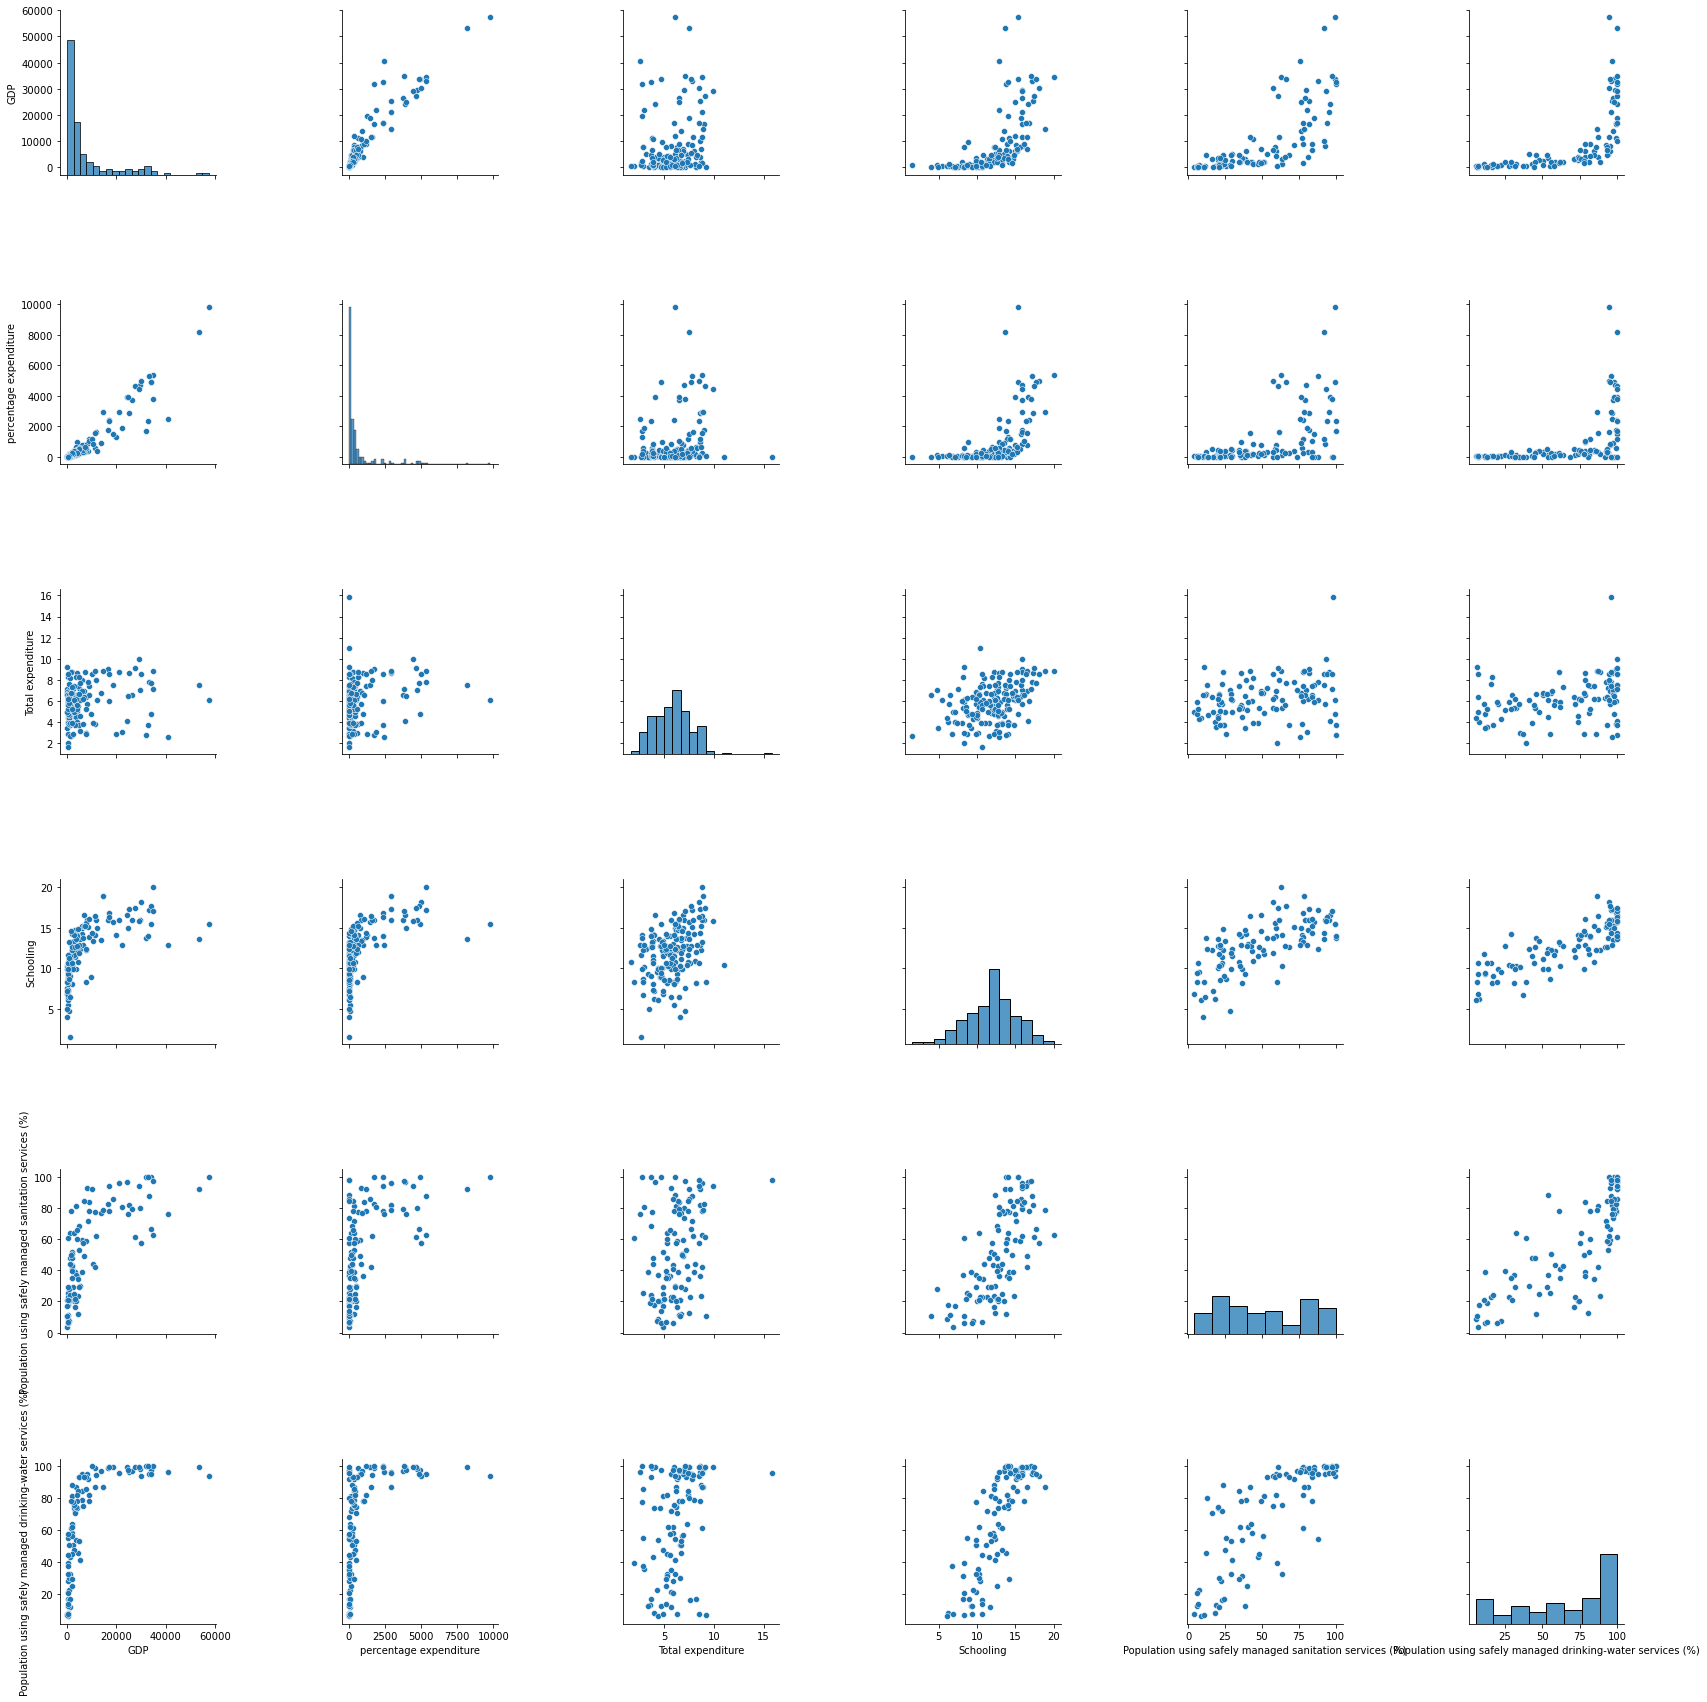

In [16]:
sns.pairplot(data=infra, height=4)
infra.corr()